### Project Background
An impression bidding model, in the context of online advertising and digital marketing, refers to the strategy used by advertisers and advertising platforms to determine how much they are willing to pay to have their ad displayed to a specific user when that user visits a website or application. This process is fundamental to the purchase of online advertising space and the optimization of advertising campaigns. Given the previous information, the case of a company is presented as follows.

An advertising technology company recently introduced a new impression bidding model for their online advertising campaigns, Average Bidding, as an alternative to their existing bidding model, Maximum Bidding. The project aims to conduct an A/B test to understand if Average Bidding performs better than Maximum Bidding. 

The company has tested for a month, measuring a set of specific metrics on a daily basis:

#### Meta data
1. Spend [USD] - The money spent.
2. Impressions - Number of times an ad appears in front of a user's sight.
3. Reach - Number of unique users who saw an ad.
4. Website Clicks - Number of clicks in the website link of the advertisement.
5. Searches - Number of searches performed on the website.
6. View Content - Number of times visitors watch the details of a product.
7. Add to Cart - Number of sessions where an item was added to the cart through the cart button.
8. Purchase - Number of times that customers make a purchase.

Now that we have all the data, the customer wants to know if average bidding brings more conversions than maximum bidding. Taking into account the variables that have been measured throughout the experiment, we can use the following metrics to find out which bidding model is better:

a) Cost Per Miles - Helps measure the cost of ads for exposure.
CPM = (Spend [USD] / # of Impressions * 1000)

b) Cost Per Click (CPC) - It allows you to evaluate the efficiency of advertising expenses to generate clicks.
CPC = (Spend [USD] / # of Website Clicks)

c) Cost Per Acquisition (CPA) - Refers to the average cost a company pays to acquire a new customer or a desired conversion, in this case it will be a purchase, through its marketing or advertising strategy.
CPA = (Spend [USD] / # of Purchase)

####  Null Hypothesis (H0): There is no difference in performance between Average Bidding and Maximum Bidding.
#### Alternative Hypothesis (H1): There is a significant difference in performance between Average Bidding and Maximum Bidding.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
# data exploration

df_c = pd.read_csv(r'C:\Users\lytoy\Downloads\ab_test\control_group.csv', delimiter=';')
df_c.head()

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_c = df_c.drop(df_c.index[4]) #4th rows lacks data, needs to delete
df_c = df_c.drop([df_c.columns[0], df_c.columns[1]], axis=1)  #campaign name and date no needed for refernce

In [4]:
df_c.head()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [5]:
df_t = pd.read_csv(r'C:\Users\lytoy\Downloads\ab_test\test_group.csv', delimiter=';')
df_t = df_t.drop([df_t.columns[0], df_t.columns[1]], axis=1)  #campaign name and date no needed for refernce
df_t.head()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,3008,39550,35820,3038,1946,1069,894,255
1,2542,100719,91236,4657,2359,1548,879,677
2,2365,70263,45198,7885,2572,2367,1268,578
3,2710,78451,25937,4216,2216,1437,566,340
4,2297,114295,95138,5863,2106,858,956,768


In [6]:
# check if there is null

any_nulls1 = df_c.isnull().any()
any_nulls2 = df_t.isnull().any()
print(any_nulls1)  
print( ) 
print(any_nulls2)

Spend [USD]       False
Impressions       False
Reach             False
Website Clicks    False
Searches          False
View Content      False
Add to Cart       False
Purchase          False
dtype: bool

Spend [USD]       False
Impressions       False
Reach             False
Website Clicks    False
Searches          False
View Content      False
Add to Cart       False
Purchase          False
dtype: bool


In [7]:
df_c.describe()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2117.862069,1840.344828,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,698.841374,653.741117,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1219.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2290.000000,1975.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2487.000000,2179.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,3549.000000,3249.000000,1913.000000,800.000000


In [8]:
df_t.describe()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [9]:
#check outliers
Q1c = df_c.quantile(0.25)
Q3c = df_c.quantile(0.75)
IQRc = Q3c - Q1c

outliers1 = (df_c < (Q1c - 1.5 * IQRc)) | (df_c > (Q3c + 1.5 * IQRc))

Q1t = df_t.quantile(0.25)
Q3t = df_t.quantile(0.75)
IQRt = Q3t - Q1t

outliers2 = (df_t < (Q1t - 1.5 * IQRt)) | (df_t > (Q3t + 1.5 * IQRt))

print(outliers1.any())
print()
print(outliers2.any())

Spend [USD]       False
Impressions       False
Reach             False
Website Clicks    False
Searches          False
View Content      False
Add to Cart       False
Purchase          False
dtype: bool

Spend [USD]       False
Impressions       False
Reach             False
Website Clicks    False
Searches          False
View Content      False
Add to Cart       False
Purchase          False
dtype: bool


Observation: The dataset exhibits a uniform distribution without any outliers, thereby satisfying one of the essential criteria for conducting a t-test.

C:\Users\lytoy\AppData\Local\Temp\ipykernel_1296\425640728.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_c[column], shade=True, label='Control Group', ax=axs[i])
C:\Users\lytoy\AppData\Local\Temp\ipykernel_1296\425640728.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_t[column], shade=True, label='Test Group', ax=axs[i])
C:\Users\lytoy\AppData\Local\Temp\ipykernel_1296\425640728.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_c[column], shade=True, label='Control Group', ax=axs[i])
C:\Users\lytoy\AppData\Local\Temp\ipykernel_1296\425640728.py:14: FutureWarning: 

`shade` is now deprecated in fav

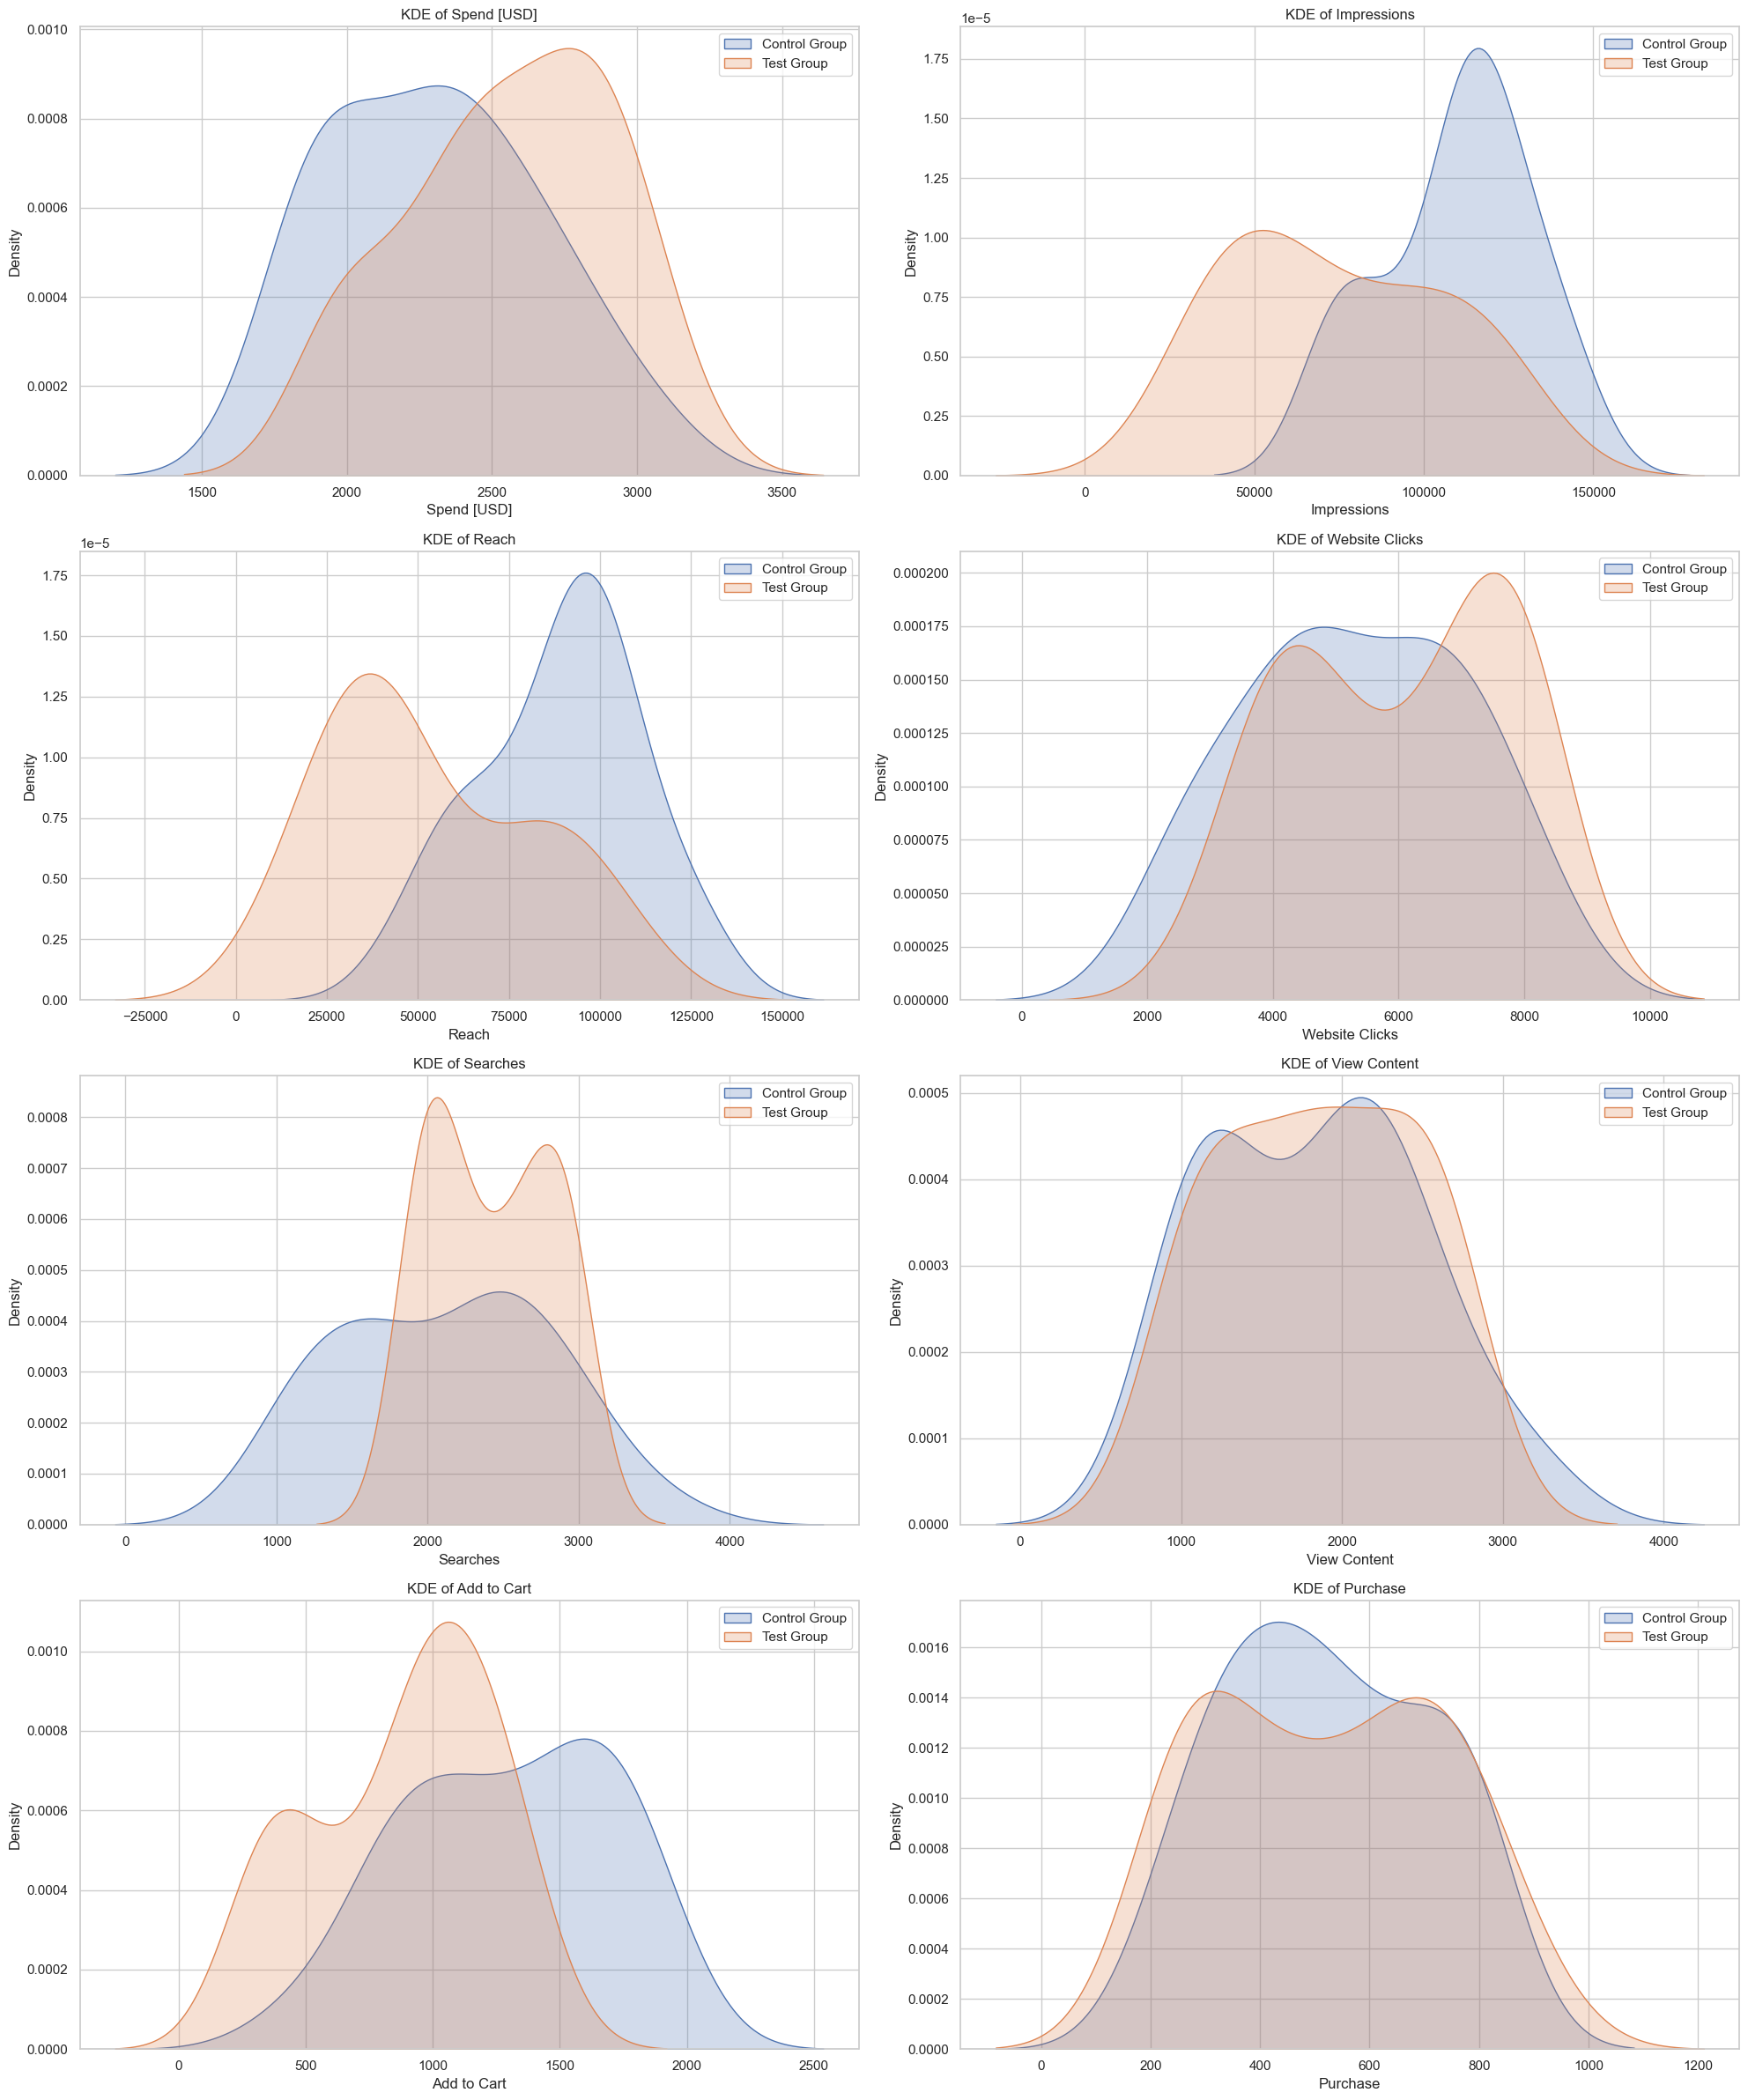

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
columns_to_plot = ['Spend [USD]', 'Impressions', 'Reach', 'Website Clicks', 'Searches', 'View Content', 'Add to Cart', 'Purchase']
num_plots = len(columns_to_plot)
num_rows = num_plots // 2 if num_plots % 2 == 0 else (num_plots // 2) + 1
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    sns.kdeplot(df_c[column], shade=True, label='Control Group', ax=axs[i])
    sns.kdeplot(df_t[column], shade=True, label='Test Group', ax=axs[i])
    axs[i].set_title(f'KDE of {column}')
    axs[i].legend()

if num_plots % 2 != 0:
    fig.delaxes(axs[-1])  

plt.tight_layout()
plt.show()


Observation: The data across each column approximate a normal distribution, satisfying the assumptions required for the validity of the t-test.

In [10]:
#calculate CPM(cost per mille), CPC(cost per click), CPA(Cost Per Acquisition)
df_c['CPM'] = (df_c['Spend [USD]'] / df_c['Impressions']) * 1000
df_c['CPC'] = df_c['Spend [USD]'] / df_c['Website Clicks']
df_c['CPA'] = df_c['Spend [USD]'] / df_c['Purchase']
df_c.head()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,CPM,CPC,CPA
0,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,27.568862,0.324971,3.689320
1,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,14.515863,0.216646,3.438356
2,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,17.788947,0.360018,6.298387
3,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,26.619830,0.632953,5.705882
5,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,28.264696,0.765392,4.035340


In [11]:
df_t['CPM'] = (df_t['Spend [USD]'] / df_t['Impressions']) * 1000
df_t['CPC'] = df_t['Spend [USD]'] / df_t['Website Clicks']
df_t['CPA'] = df_t['Spend [USD]'] / df_t['Purchase']
df_t.head()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,CPM,CPC,CPA
0,3008,39550,35820,3038,1946,1069,894,255,76.055626,0.990125,11.796078
1,2542,100719,91236,4657,2359,1548,879,677,25.238535,0.545845,3.754801
2,2365,70263,45198,7885,2572,2367,1268,578,33.659252,0.299937,4.091696
3,2710,78451,25937,4216,2216,1437,566,340,34.543855,0.642789,7.970588
4,2297,114295,95138,5863,2106,858,956,768,20.097117,0.391779,2.990885


#### Null Hypothesis (H0): There is no difference in performance between Average Bidding and Maximum Bidding.
#### Alternative Hypothesis (H1): There is a significant difference in performance between Average Bidding and Maximum Bidding.

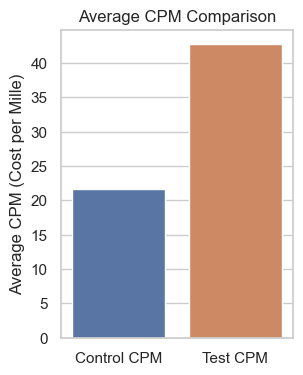

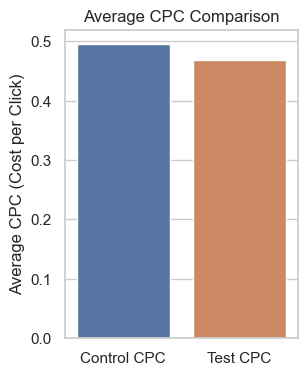

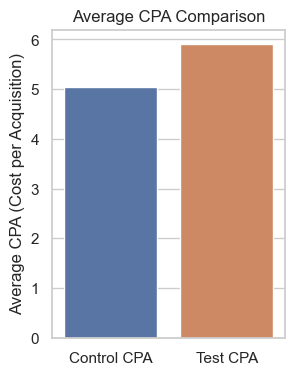

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# calculate mean for CPM, CPC, CPA
avg_cpm_c = df_c['CPM'].mean()
avg_cpc_c = df_c['CPC'].mean()
avg_cpa_c = df_c['CPA'].mean()

avg_cpm_t = df_t['CPM'].mean()
avg_cpc_t = df_t['CPC'].mean()
avg_cpa_t = df_t['CPA'].mean()

# CPM chart
plt.figure(figsize=(3, 4))
sns.barplot(x=['Control CPM', 'Test CPM'], y=[avg_cpm_c, avg_cpm_t])
plt.title('Average CPM Comparison')
plt.ylabel('Average CPM (Cost per Mille)')
plt.show()

# CPC chart
plt.figure(figsize=(3, 4))
sns.barplot(x=['Control CPC', 'Test CPC'], y=[avg_cpc_c, avg_cpc_t])
plt.title('Average CPC Comparison')
plt.ylabel('Average CPC (Cost per Click)')
plt.show()

# CPA chart
plt.figure(figsize=(3, 4))
sns.barplot(x=['Control CPA', 'Test CPA'], y=[avg_cpa_c, avg_cpa_t])
plt.title('Average CPA Comparison')
plt.ylabel('Average CPA (Cost per Acquisition)')
plt.show()


In [16]:
# run t-test to see if there is significant difference between the test and control group data
from scipy import stats

metrics_to_test = ['CPM', 'CPC', 'CPA']

for metric in metrics_to_test:
    t_stat, p_val = stats.ttest_ind(df_c[metric].dropna(), df_t[metric].dropna(), equal_var=False)
    print(f"{metric} t-test result: t-statistic = {t_stat}, p-value = {p_val}")


CPM t-test result: t-statistic = -4.737954263119068, p-value = 4.423819176973418e-05
CPC t-test result: t-statistic = 0.49967335457872314, p-value = 0.619342528232053
CPA t-test result: t-statistic = -1.3135745210323702, p-value = 0.19455276746682634


Observation: 
CPM - reject H0, indicating there is a significant difference in performance between Average Bidding and Maximum Bidding.
CPC, CPA - can't reject H0, suggesting there is no significant difference in performance between Average Bidding and Maximum Bidding.¶

In [22]:
import numpy as np

mean_c = df_c['CPM'].mean()
mean_t = df_t['CPM'].mean()

sd_c = df_c['CPM'].std()
sd_t = df_t['CPM'].std()

n_c = len(df_c['CPM'].dropna())
n_t = len(df_t['CPM'].dropna())

s_pooled = np.sqrt(((sd_c ** 2) * (n_c - 1) + (sd_t ** 2) * (n_t - 1)) / (n_c + n_t - 2))
cohen_d = (mean_c - mean_t) / s_pooled
print("Cohen's d:", cohen_d)


Cohen's d: -1.2143549354785932


Observation: The calculated Cohen's d value indicates a substantial effect size, suggesting that the difference in CPM between the test and control groups is not only statistically significant but also of meaningful magnitude in practical terms.

#### Summary

CPM: The significance test for CPM revealed a statistically significant difference (t = -4.74, p < 0.0001), indicating that the CPM in the test group was significantly lower compared to the control group.

CPC: The analysis for CPC did not show a significant difference (t = 0.50, p = 0.619), suggesting that there was no substantial change in CPC between the two groups.

CPA: Similarly, the CPA results also indicated no significant difference (t = -1.31, p = 0.195), demonstrating that the CPA did not vary significantly across the groups.

Only the CPM showed a statistically significant variation, while the changes in CPC and CPA were not significant. In particular, the Cohen's d value of CPM also suggest meaningful magnitude in practical terms.

#### In short, the new model "Average Bidding" can effectively reduce the CPM but not CPC and CPA, comparing to the existing  model "Maximum Bidding". "Average Bidding" is a more cost effective choice for clients who focus on increasing brand awareness. For the clients seeking conversion, there is no difference of using either the new model.
